In [1]:
from src.data_loader import UCF101_Dataset_Loader
from src.training import DEVICE, Mixed_Precision_Single_Core_Trainer
from src.model_architectures import AlexNet3D
from src.utils import plot_metrics

import torch
import numpy as np

from tqdm import tqdm

In [2]:
ucf_data_dir = "data/BG_Mask_Full_data/"
ucf_label_dir = "data/ucfTrainTestlist/"
frames_per_clip = 16
step_between_clips = 1

height = 112
width = 112

batch_size = 256

In [3]:
ucf101 = UCF101_Dataset_Loader(ucf_data_dir, ucf_label_dir, frames_per_clip, step_between_clips, height, width, batch_size)

Loading Training Data .........


100%|██████████| 85/85 [00:01<00:00, 58.32it/s]


Loading Testing Data .........


100%|██████████| 85/85 [00:01<00:00, 57.66it/s]



Total number of train samples: 6633
Total number of test samples: 2532
Total number of (train) batches: 26
Total number of (test) batches: 10


Total Number of Classes: 10


#### Model Training

In [4]:
torch.manual_seed(69)
alex_net_model = AlexNet3D((frames_per_clip, height, width), len(ucf101.classes)).to(device=DEVICE)
alex_net_model

AlexNet3D(
  (max_pool): MaxPool3d(kernel_size=3, stride=2, padding=(1, 1, 1), dilation=1, ceil_mode=False)
  (conv1): Conv3d(3, 96, kernel_size=(5, 5, 5), stride=(2, 2, 2), padding=(3, 0, 0))
  (conv2): Conv3d(96, 256, kernel_size=(5, 5, 5), stride=(1, 1, 1), padding=(3, 2, 2))
  (conv3): Conv3d(256, 384, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv4): Conv3d(384, 384, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (conv5): Conv3d(384, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(3, 1, 1))
  (linear1): Linear(in_features=100352, out_features=4096, bias=True)
  (linear2): Linear(in_features=4096, out_features=4096, bias=True)
  (linear3): Linear(in_features=4096, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (softmax): Softmax(dim=1)
)

In [5]:
EPOCHS = 10
optimizer = torch.optim.Adam(alex_net_model.parameters(), lr=4e-5)
mp_trainer = Mixed_Precision_Single_Core_Trainer(len(ucf101.classes))

In [6]:
output_metrics = mp_trainer.training_loop(alex_net_model,ucf101.train_loader,ucf101.test_loader,EPOCHS, optimizer)

100%|██████████| 10/10 [02:28<00:00, 14.81s/it]


For Epoch 1 We Train Loss:2.1539932122597327, Test Loss:2.195331072807312, Train Accuracy:0.2041984085853283, Test Accuracy:0.19393642097711564


100%|██████████| 10/10 [02:35<00:00, 15.52s/it]


For Epoch 2 We Train Loss:1.9160146850806017, Test Loss:2.1827788591384887, Train Accuracy:0.44287171272131115, Test Accuracy:0.23339500278234482


100%|██████████| 10/10 [02:39<00:00, 15.95s/it]


For Epoch 3 We Train Loss:1.843902432001554, Test Loss:2.1468575954437257, Train Accuracy:0.5025665393242469, Test Accuracy:0.2696949362754822


100%|██████████| 10/10 [02:38<00:00, 15.88s/it]


For Epoch 4 We Train Loss:1.7811332299159124, Test Loss:2.096901059150696, Train Accuracy:0.5520043258483593, Test Accuracy:0.31426828503608706


100%|██████████| 10/10 [02:33<00:00, 15.35s/it]


For Epoch 5 We Train Loss:1.7610302384083087, Test Loss:2.0900732278823853, Train Accuracy:0.5645747918349046, Test Accuracy:0.319110581278801


100%|██████████| 10/10 [02:33<00:00, 15.38s/it]


For Epoch 6 We Train Loss:1.7454680387790387, Test Loss:2.1004489421844483, Train Accuracy:0.5774468917113084, Test Accuracy:0.30773533284664156


100%|██████████| 10/10 [02:30<00:00, 15.06s/it]


For Epoch 7 We Train Loss:1.7388137395565326, Test Loss:2.0946586608886717, Train Accuracy:0.5851085140154912, Test Accuracy:0.30710666477680204


100%|██████████| 10/10 [02:31<00:00, 15.15s/it]


For Epoch 8 We Train Loss:1.7389632004957933, Test Loss:2.08818838596344, Train Accuracy:0.583378539635585, Test Accuracy:0.3168882101774216


100%|██████████| 10/10 [02:31<00:00, 15.12s/it]


For Epoch 9 We Train Loss:1.7332611680030823, Test Loss:2.0771093368530273, Train Accuracy:0.5883912077316871, Test Accuracy:0.3231185585260391


100%|██████████| 10/10 [02:33<00:00, 15.37s/it]

For Epoch 10 We Train Loss:1.7306635150542626, Test Loss:2.090167284011841, Train Accuracy:0.5896638310872592, Test Accuracy:0.3102588325738907


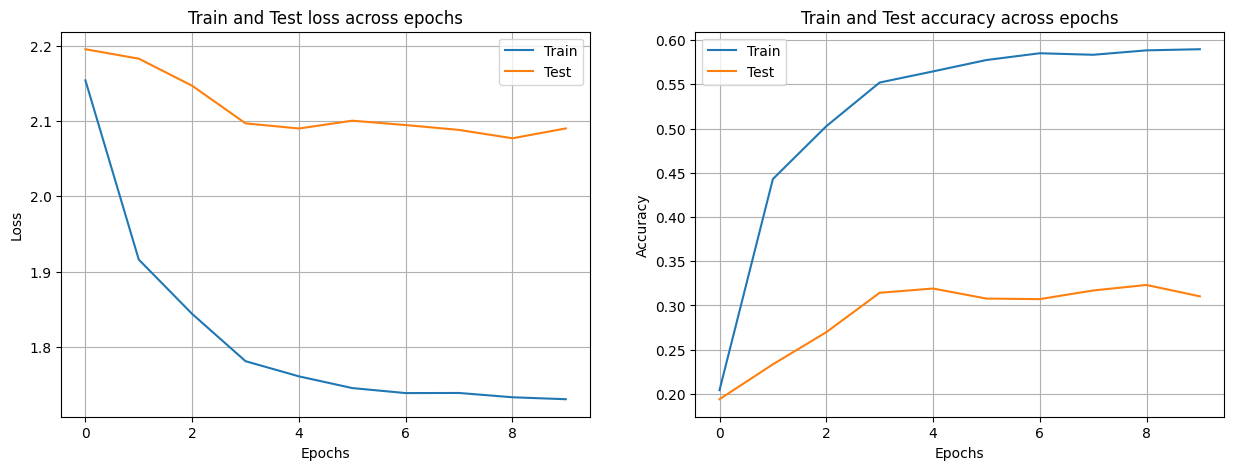

In [7]:
plot_metrics(EPOCHS, output_metrics)

In [8]:
torch.save(alex_net_model.state_dict(), 'models/alex_net_bg_mask_data.pth')